In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# Read data

In [71]:
pca_channel_breakdown = pd.read_csv('PCA_C6.csv')
pca_all_channel = pd.read_csv('PCA_C6_ALL.csv')
pca_c_spectral = pd.read_csv('PCA_C6_EEG_C_spectral.csv')
pca_d_spectral = pd.read_csv('PCA_C6_EEG_D_spectral.csv')

cebra_channel_breakdown = pd.read_csv('CEBRA_D8_U256.csv')
cebra_all_channel = pd.read_csv('CEBRA_D8_U256_ALL.csv')
cebra_c_spectral = pd.read_csv('CEBRA_D8_U256_EEG_C_spectral.csv')
cebra_d_spectral = pd.read_csv('CEBRA_D8_U256_EEG_D_spectral.csv')

# Read rand index results
aduio_ari = pd.read_csv('../aduio_ari.csv')
print('mean:',aduio_ari['ari'].mean(), 'max:', aduio_ari['ari'].max(), 'min:', aduio_ari['ari'].min())

high_c = aduio_ari[aduio_ari['ari'] > aduio_ari['ari'].mean()]
low_c = aduio_ari[aduio_ari['ari'] <= aduio_ari['ari'].mean()]
print(len(high_c), len(low_c))

mean: 0.34038798576560975 max: 0.6732360097 min: 0.01374570447
18 23


# Compare across spectral features

/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolo

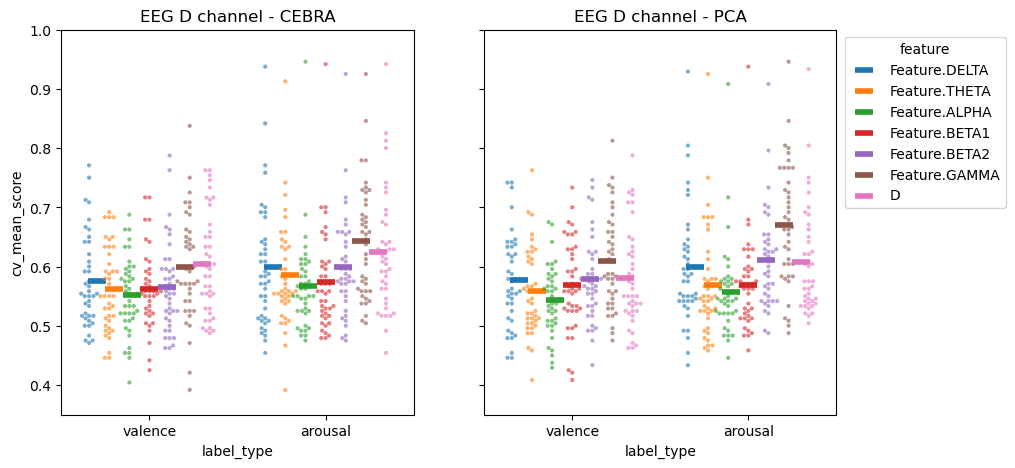

In [73]:
filtered_channel = 'D'
cebra_result = pd.concat(
    [
        cebra_d_spectral,
        cebra_channel_breakdown[cebra_channel_breakdown["channel"].isin([filtered_channel])],
    ]
)
pca_result = pd.concat(
    [
        pca_d_spectral,
        pca_channel_breakdown[pca_channel_breakdown["channel"].isin([filtered_channel])],
    ]
)

fig, axes = plt.subplots(
    nrows=1,
    sharey=True,
    ncols=2,
    figsize=(2 * 5, 1 * 5),
)
for idx, (method, result) in enumerate([("CEBRA", cebra_result), ("PCA", pca_result)]):
    title = f"EEG {filtered_channel} channel - {method}"  #
    g = sns.swarmplot(
        data=result,
        x="label_type",
        y="cv_mean_score",
        hue="channel",
        alpha=0.6,
        dodge=True,
        legend=False,
        size=3,
        ax=axes.flat[idx],
    )
    g.set_ylim((0.35, 1))
    
    df_means = (
        result.groupby(["label_type", "channel"])["cv_mean_score"]
        .agg("mean")
        .reset_index()
    )
    pp = sns.pointplot(
        x="label_type",
        y="cv_mean_score",
        data=df_means,
        hue="channel",
        dodge=0.6,
        linestyles="",
        errorbar=None,
        scale=2,
        markers="_",
        ax=axes.flat[idx],
        hue_order=[
            "Feature.DELTA",
            "Feature.THETA",
            "Feature.ALPHA",
            "Feature.BETA1",
            "Feature.BETA2",
            "Feature.GAMMA",
            filtered_channel,
        ],
        order=["valence", "arousal"],
    )

    axes.flat[idx].get_legend().set_visible((idx == 1))
    if idx == 1:
        axes.flat[idx].get_legend().set_title('feature')
        sns.move_legend(pp, "upper right", bbox_to_anchor=(1.5, 1))

    g.set_title(title)

# Compare across channels

/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolo

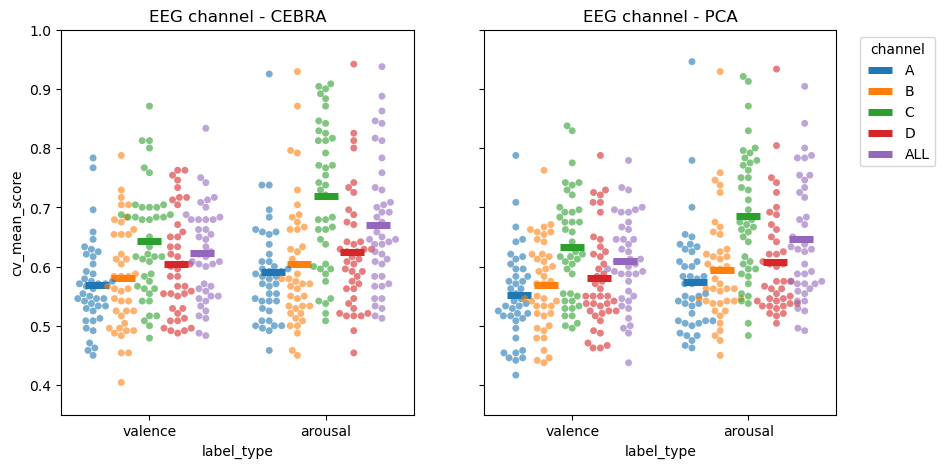

In [24]:
cebra_result = pd.concat(
    [
        cebra_channel_breakdown,
        cebra_all_channel,
    ]
)
pca_result = pd.concat(
    [
        pca_channel_breakdown,
        pca_all_channel,
    ]
)

fig, axes = plt.subplots(
    nrows=1,
    sharey=True,
    ncols=2,
    figsize=(2 * 5, 1 * 5),
)
for idx, (method, result) in enumerate([("CEBRA", cebra_result), ("PCA", pca_result)]):
    title = f"EEG channel - {method}"  #
    g = sns.swarmplot(
        data=result,
        x="label_type",
        y="cv_mean_score",
        hue="channel",
        alpha=0.6,
        dodge=True,
        legend=False,
        ax=axes.flat[idx],
    )
    g.set_ylim((0.35, 1))
    
    df_means = (
        result.groupby(["label_type", "channel"])["cv_mean_score"]
        .agg("mean")
        .reset_index()
    )
    pp = sns.pointplot(
        x="label_type",
        y="cv_mean_score",
        data=df_means,
        hue="channel",
        dodge=0.6,
        linestyles="",
        errorbar=None,
        scale=2.5,
        markers="_",
        ax=axes.flat[idx],
        hue_order=["A", "B", "C", "D", "ALL"],
        order=["valence", "arousal"],
    )
    axes.flat[idx].get_legend().set_visible((idx == 1))
    if idx == 1:
        sns.move_legend(pp, "upper right", bbox_to_anchor=(1.3, 1))

    g.set_title(title)

## Consistency home - in lab breakdown

/var/folders/6y/khb9drcn0p373bwf72szrzvm0000gn/T/ipykernel_35176/3163401010.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["subject"] = result["subject"].astype(int)
/var/folders/6y/khb9drcn0p373bwf72szrzvm0000gn/T/ipykernel_35176/3163401010.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["consistency_level"] = consistency_level
/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.121568627450980

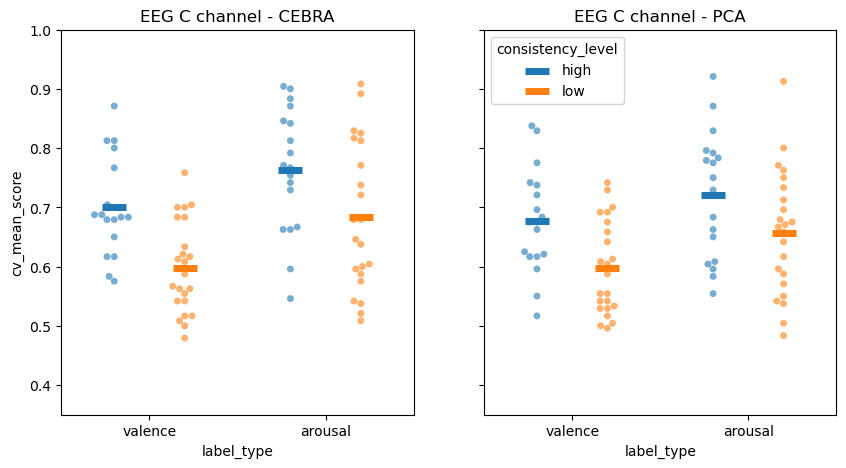

In [54]:
fig, axes = plt.subplots(
    nrows=1,
    sharey=True,
    ncols=2,
    figsize=(2 * 5, 1 * 5),
)
for idx, (method, result) in enumerate(
    [("CEBRA", cebra_channel_breakdown), ("PCA", pca_channel_breakdown)]
):
    channel_mask = result["channel"].isin(["C"])
    result = result[channel_mask]
    result["subject"] = result["subject"].astype(int)

    consistency_level = []
    for s in list(result["subject"]):
        level = "high" if s in set(high_c["subject"]) else "low"
        consistency_level.append(level)

    result["consistency_level"] = consistency_level

    title = f"EEG C channel - {method}"  #
    g = sns.swarmplot(
        data=result,
        x="label_type",
        y="cv_mean_score",
        hue="consistency_level",
        alpha=0.6,
        dodge=True,
        legend=False,
        ax=axes.flat[idx],
    )
    g.set_ylim((0.35, 1))

    df_means = (
        result.groupby(["label_type", "consistency_level"])["cv_mean_score"]
        .agg("mean")
        .reset_index()
    )
    pp = sns.pointplot(
        x="label_type",
        y="cv_mean_score",
        data=df_means,
        hue="consistency_level",
        dodge=0.4,
        linestyles="",
        errorbar=None,
        scale=2.5,
        markers="_",
        ax=axes.flat[idx],
        hue_order=["high", "low"],
        order=["valence", "arousal"],
    )
    axes.flat[idx].get_legend().set_visible((idx == 1))

    g.set_title(title)